1. Loading the libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')
from nltk.corpus import stopwords
import nltk
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow import keras
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display

ModuleNotFoundError: No module named 'tensorflow.python'

In [2]:
emotion_df=pd.read_csv("emotion.csv")

In [3]:
emotion_df.head()

,Unnamed: 0,text,label
0,0,i just feel really helpless and heavy hearted,4
1,1,ive enjoyed being able to slouch about relax a...,0
2,2,i gave up my internship with the dmrg and am f...,4
3,3,i dont know i feel so lost,0
4,4,i am a kindergarten teacher and i am thoroughl...,4


In [4]:
violence_df=pd.read_csv("violence.csv")

In [5]:
violence_df.head()

,Tweet_ID,tweet,type
0,ID_0022DWKP,Had a dream i got raped last night. By a guy i...,sexual_violence
1,ID_00395QYM,he thought the word raped means sex and told m...,sexual_violence
2,ID_003EOSSF,She NOT TALKING TO ME I WAS RAPED BY 2 MEN 1 M...,sexual_violence
3,ID_004BBHOD,I was sexually abused for 3 years at age 4 to ...,sexual_violence
4,ID_004F7516,Chessy Prout can do better by telling the trut...,sexual_violence


In [6]:
hate_df=pd.read_csv("hatespeech.csv")

In [7]:
hate_df.head()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


2. Data Preprocessing

In [8]:
emotion_df.drop(columns=['Unnamed: 0'],inplace=True)

In [9]:
emotion_df.head()

,text,label
0,i just feel really helpless and heavy hearted,4
1,ive enjoyed being able to slouch about relax a...,0
2,i gave up my internship with the dmrg and am f...,4
3,i dont know i feel so lost,0
4,i am a kindergarten teacher and i am thoroughl...,4


In [10]:
violence_df.drop(columns=['Tweet_ID'],inplace=True)

In [11]:
violence_df.head()

,tweet,type
0,Had a dream i got raped last night. By a guy i...,sexual_violence
1,he thought the word raped means sex and told m...,sexual_violence
2,She NOT TALKING TO ME I WAS RAPED BY 2 MEN 1 M...,sexual_violence
3,I was sexually abused for 3 years at age 4 to ...,sexual_violence
4,Chessy Prout can do better by telling the trut...,sexual_violence


In [12]:
hate_df.drop(columns=['Unnamed: 0'],inplace=True)

In [13]:
hate_df=hate_df[['tweet','class']]

In [14]:
hate_df.head()

,tweet,class
0,!!! RT @mayasolovely: As a woman you shouldn't...,2
1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,1
2,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,1
3,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,1
4,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,1


In [15]:
emotion_df.columns,violence_df.columns,hate_df.columns

(Index(['text', 'label'], dtype='object'),
 Index(['tweet', 'type'], dtype='object'),
 Index(['tweet', 'class'], dtype='object'))

In [16]:
violence_df.rename(columns={'tweet' : 'text','type':'label'},inplace=True)
hate_df.rename(columns={'tweet' : 'text','class':'label'},inplace=True)

In [17]:
emotion_df.columns,violence_df.columns,hate_df.columns

(Index(['text', 'label'], dtype='object'),
 Index(['text', 'label'], dtype='object'),
 Index(['text', 'label'], dtype='object'))

In [18]:
emotion_df.isna().sum(),violence_df.isna().sum(),hate_df.isna().sum()

(text     0
 label    0
 dtype: int64,
 text     0
 label    0
 dtype: int64,
 text     0
 label    0
 dtype: int64)

In [19]:
emotion_df.shape,violence_df.shape,hate_df.shape

((416809, 2), (39650, 2), (24783, 2))

In [20]:
emotion_df['label'].value_counts()

label
1    141067
0    121187
3     57317
4     47712
2     34554
5     14972
Name: count, dtype: int64

In [21]:
e_df=pd.DataFrame()
for i in range(6) :
    subset=emotion_df[emotion_df['label']==i].sample(n=2000,random_state=42)
    e_df=pd.concat([e_df,subset])

In [22]:
e_df.shape

(12000, 2)

In [23]:
emotion_df=e_df.copy()

In [24]:
emotion_df['label'].value_counts()

label
0    2000
1    2000
2    2000
3    2000
4    2000
5    2000
Name: count, dtype: int64

In [25]:
violence_df['label'].value_counts()

label
sexual_violence                 32648
Physical_violence                5946
emotional_violence                651
economic_violence                 217
Harmful_Traditional_practice      188
Name: count, dtype: int64

In [26]:
sexual_violence=violence_df[violence_df['label']=='sexual_violence'].sample(n=4998, random_state=42)
violence_df=violence_df[violence_df['label']!='sexual_violence']

In [27]:
violence_df.shape

(7002, 2)

In [28]:
violence_df=pd.concat([sexual_violence,violence_df],axis=0)

In [29]:
violence_df.shape

(12000, 2)

In [30]:
hate_df['label'].value_counts()

label
1    19190
2     4163
0     1430
Name: count, dtype: int64

In [31]:
label1=hate_df[hate_df['label']==1].sample(n=6407, random_state=42)
hate_df=hate_df[hate_df['label']!=1]

In [32]:
hate_df.shape

(5593, 2)

In [33]:
hate_df=pd.concat([label1,hate_df],axis=0)

In [34]:
hate_df.shape

(12000, 2)

In [35]:
emotion_df.shape,violence_df.shape,hate_df.shape

((12000, 2), (12000, 2), (12000, 2))

In [36]:
emotion_df.reset_index(drop=True,inplace=True)
violence_df.reset_index(drop=True,inplace=True)
hate_df.reset_index(drop=True,inplace=True)

3.Label Encoding

In [37]:
label_encoder=LabelEncoder()
violence_df['label']=label_encoder.fit_transform(violence_df['label'])

In [38]:
violence_df.head()

,text,label
0,My cousin was raped by this guy Matthew. She w...,4
1,HAHAHAHAHAHAHHA I DIDN’T SEE IT THE FIRST TIME...,4
2,I remember how I almost got raped like it was ...,4
3,He raped me 👈,4
4,"A woman raped by A male: psychological horror,...",4


In [39]:
violence_df['label'].unique()

array([4, 1, 3, 0, 2])

4. Stopwords Removal

In [40]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [41]:
stop_words=set(stopwords.words('english'))

In [42]:
len(stop_words)

179

In [43]:
def remove_stopwords(text) :
    all_words=nltk.word_tokenize(text)
    filtered_words=[word for word in all_words if word.lower() not in stop_words]
    return " ".join(filtered_words)

emotion_df['text']=emotion_df['text'].apply(remove_stopwords)
violence_df['text']=violence_df['text'].apply(remove_stopwords)
hate_df['text']=hate_df['text'].apply(remove_stopwords)

5. Tokenization and Padding

In [44]:
tokenizer=Tokenizer()
tokenizer.fit_on_texts(pd.concat([emotion_df['text'],violence_df['text'],hate_df['text']]))

In [45]:
emotion_sequences=tokenizer.texts_to_sequences(emotion_df['text'])
violence_sequences=tokenizer.texts_to_sequences(violence_df['text'])
hate_sequences=tokenizer.texts_to_sequences(hate_df['text'])

In [46]:
emotion_df['text'].iloc[2]

'feel like lost mourned moved past tears relationship'

In [47]:
emotion_sequences[2:3]

[[1, 5, 321, 11854, 1207, 422, 1093, 385]]

In [48]:
max_length=50
emotion_padded=pad_sequences(emotion_sequences,maxlen=max_length,padding='post')
violence_padded=pad_sequences(violence_sequences,maxlen=max_length,padding='post')
hate_padded=pad_sequences(hate_sequences,maxlen=max_length,padding='post')

In [49]:
emotion_padded[2:3]

array([[    1,     5,   321, 11854,  1207,   422,  1093,   385,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0]], dtype=int32)

In [50]:
emotion_labels=np.array(emotion_df['label'])
violence_labels=np.array(violence_df['label'])
hate_labels=np.array(hate_df['label'])

6. Model Definition

In [51]:
emotion_input=emotion_padded
violence_input=violence_padded
hate_input=hate_padded

In [52]:
emotion_input_layer=keras.layers.Input(shape=(max_length,),name='emotion_input')
violence_input_layer=keras.layers.Input(shape=(max_length,),name='violence_input')
hate_input_layer=keras.layers.Input(shape=(max_length,),name='hate_input')

In [53]:
embedding_layer=keras.layers.Embedding(input_dim=len(tokenizer.word_index)+1,output_dim=128)

In [54]:
#apply embedding layer to each input
emotion_embedding=embedding_layer(emotion_input_layer)
violence_embedding=embedding_layer(violence_input_layer)
hate_embedding=embedding_layer(hate_input_layer)

In [55]:
#shared LSTM layer
shared_lstm=keras.layers.LSTM(64, return_sequences=True)

In [56]:
emotion_lstm=shared_lstm(emotion_embedding)
violence_lstm=shared_lstm(violence_embedding)
hate_lstm=shared_lstm(hate_embedding)

In [57]:
#shared global average pooling layer and dropout layer
shared_pooling = keras.layers.GlobalAveragePooling1D()
shared_dropout = keras.layers.Dropout(0.5)

In [58]:
emotion_features = shared_dropout(shared_pooling(emotion_lstm))
violence_features = shared_dropout(shared_pooling(violence_lstm))
hate_features = shared_dropout(shared_pooling(hate_lstm))

In [59]:
len(emotion_df['label'].unique()),len(violence_df['label'].unique()),len(hate_df['label'].unique())

(6, 5, 3)

In [60]:
#output layers
emotion_output = keras.layers.Dense(6,activation = 'softmax', name='emotion_output')(emotion_features)
violence_output = keras.layers.Dense(5,activation = 'softmax', name='violence_output')(violence_features)
hate_output = keras.layers.Dense(3,activation = 'softmax', name='hate_output')(hate_features)

In [61]:
#compile the model with multiple inputs and outputs
model = keras.models.Model(inputs = [emotion_input_layer,violence_input_layer,hate_input_layer],
                           outputs=[emotion_output,violence_output,hate_output])

In [62]:
model.compile(optimizer='adam',
              loss ={
                  'emotion_output' : 'sparse_categorical_crossentropy',
                  'violence_output' : 'sparse_categorical_crossentropy',
                  'hate_output' : 'sparse_categorical_crossentropy'
              },
              metrics = {
                  'emotion_output' : 'accuracy',
                  'violence_output' : 'accuracy',
                  'hate_output' : 'accuracy',
              })

In [63]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ emotion_input       │ (None, 50)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ violence_input      │ (None, 50)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ hate_input          │ (None, 50)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding           │ (None, 50, 128)   │  5,350,528 │ emotion_input[0]… │
│ (Embedding)         │                   │            │ violence_input[0… │
│                     │                   │            │ hate_input[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm (LSTM)         │ (None, 50, 64)    │     49,408 │ embedding[0][0],  │
│                     │                   │            │ embedding[1][0],  │
│                     │                   │            │ embedding[2][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_average_poo… │ (None, 64)        │          0 │ lstm[0][0],       │
│ (GlobalAveragePool… │                   │            │ lstm[1][0],       │
│                     │                   │            │ lstm[2][0]        │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 64)        │          0 │ global_average_p… │
│                     │                   │            │ global_average_p… │
│                     │                   │            │ global_average_p… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ emotion_output      │ (None, 6)         │        390 │ dropout[0][0]     │
│ (Dense)             │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ violence_output     │ (None, 5)         │        325 │ dropout[1][0]     │
│ (Dense)             │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ hate_output (Dense) │ (None, 3)         │        195 │ dropout[2][0]     │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 5,400,846 (20.60 MB)

 Trainable params: 5,400,846 (20.60 MB)

 Non-trainable params: 0 (0.00 B)

In [64]:
#Training the model with separate inputs
model.fit(x ={'emotion_input' : emotion_input,
              'violence_input' : violence_input,
              'hate_input' : hate_input},
              y={
              'emotion_output' : emotion_labels,
              'violence_output' : violence_labels,
              'hate_output' : hate_labels 
              },
              epochs=10,
              batch_size=4)


Epoch 1/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 178s 57ms/step - emotion_output_accuracy: 0.2368 - emotion_output_loss: 1.7233 - hate_output_accuracy: 0.6839 - hate_output_loss: 0.7501 - loss: 2.8897 - violence_output_accuracy: 0.8596 - violence_output_loss: 0.4163
Epoch 2/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 188s 63ms/step - emotion_output_accuracy: 0.6913 - emotion_output_loss: 0.8521 - hate_output_accuracy: 0.8737 - hate_output_loss: 0.3937 - loss: 1.3125 - violence_output_accuracy: 0.9778 - violence_output_loss: 0.0667
Epoch 3/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 202s 67ms/step - emotion_output_accuracy: 0.9347 - emotion_output_loss: 0.2092 - hate_output_accuracy: 0.9286 - hate_output_loss: 0.2142 - loss: 0.4409 - violence_output_accuracy: 0.9949 - violence_output_loss: 0.0175
Epoch 4/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 178s 59ms/step - emotion_output_accuracy: 0.9636 - emotion_output_loss: 0.1150 - hate_output_accuracy: 0.9679 - hate_output_loss: 0.0968 - loss: 0.2199 - violence_output_accuracy

In [65]:
prediction = model.predict({
    'emotion_input' : emotion_input,
    'violence_input' : violence_input,
    'hate_input' : hate_input
})

375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step


In [66]:
prediction

[array([[9.9998450e-01, 8.8494180e-06, 3.4625009e-07, 4.8177144e-06,
         1.3794192e-06, 1.2314311e-08],
        [9.9999654e-01, 2.4396090e-07, 9.3656327e-09, 2.6667103e-06,
         5.4266860e-07, 2.3237210e-09],
        [9.9999368e-01, 9.0638838e-07, 5.1371604e-08, 4.4802964e-06,
         9.9158717e-07, 1.8983819e-08],
        ...,
        [5.7707835e-05, 6.8606969e-05, 5.6748422e-06, 1.6441085e-05,
         1.1422262e-03, 9.9870944e-01],
        [5.3245759e-07, 1.5195498e-06, 8.9370928e-08, 2.9012512e-07,
         1.0793142e-05, 9.9998677e-01],
        [4.5196648e-05, 9.8984761e-05, 5.5608862e-06, 2.7361406e-05,
         2.4398310e-04, 9.9957877e-01]], dtype=float32),
 array([[2.5710334e-10, 3.6140268e-11, 1.8497491e-10, 6.1573947e-11,
         1.0000000e+00],
        [1.5766320e-09, 1.6497926e-09, 6.3922387e-09, 1.0240728e-09,
         1.0000000e+00],
        [3.1035459e-08, 2.3751807e-09, 5.7534538e-10, 2.6105054e-10,
         1.0000000e+00],
        ...,
        [1.7639643e-0

In [67]:
emotion_pred = np.argmax(prediction[0], axis = 1)
violence_pred = np.argmax(prediction[1], axis = 1)
hate_pred = np.argmax(prediction[2], axis = 1)

In [68]:
def plot_cm(true, pred, title, labels) :
    cf = confusion_matrix(true, pred, normalize='true')
    plt.figure(figsize =(7,6))
    sns.heatmap(cf,annot=True, cmap='Blues', xticklabels=labels,yticklabels=labels)
    plt.title(title)
    plt.ylabel('Actual')
    plt.xlabel('Predicted')

emotion_labels_text = ['sadness','joy','love','anger','fear','surprise']
violence_labels_text = ['sexual_violence','physical_violence','emotional_violence','harmful_traditional_practices','economic_violence']
hate_labels_text=['offensive_speech','neither','hate_speech']

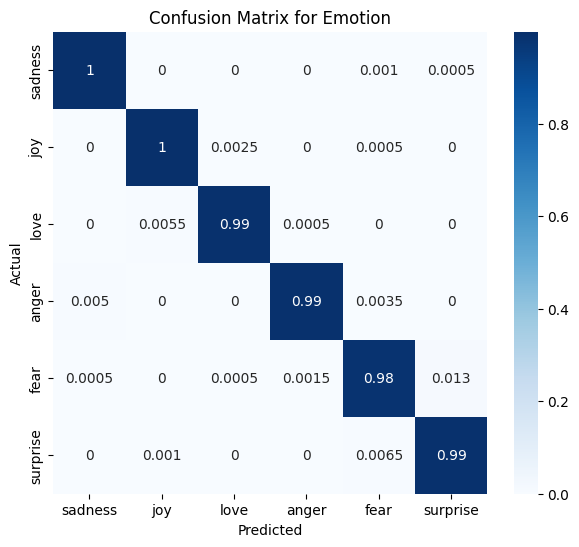

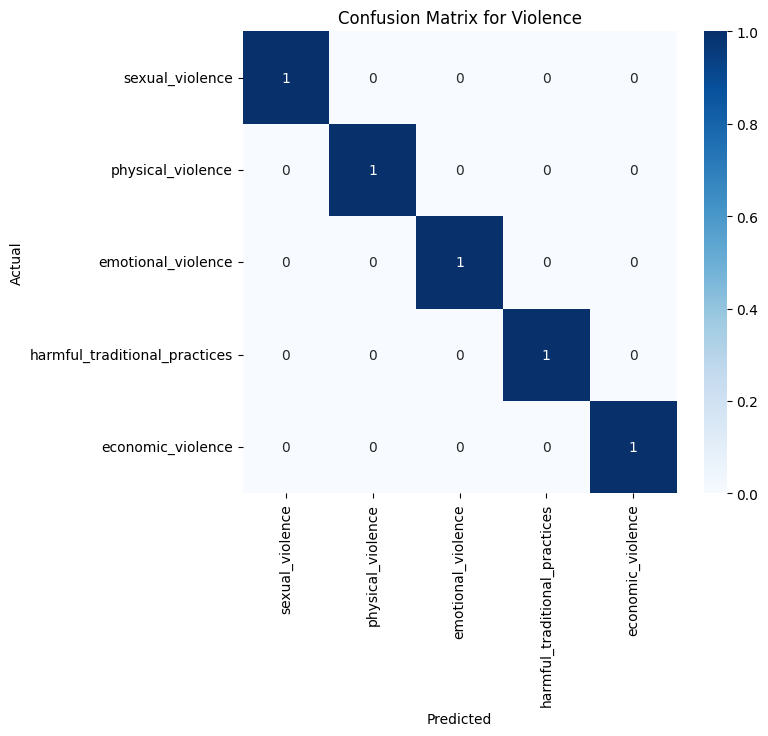

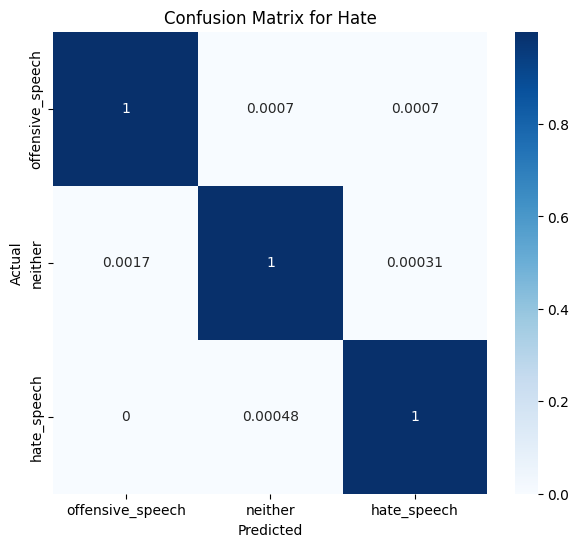

In [69]:
plot_cm(emotion_labels, emotion_pred, 'Confusion Matrix for Emotion', emotion_labels_text)
plot_cm(violence_labels, violence_pred, 'Confusion Matrix for Violence', violence_labels_text)
plot_cm(hate_labels, hate_pred, 'Confusion Matrix for Hate', hate_labels_text)

8. Manual Testing

In [70]:
def classify_text(input_text) :
    input_text_cleaned=remove_stopwords(input_text)
    input_sequence=tokenizer.texts_to_sequences([input_text_cleaned])
    input_padded=pad_sequences(input_sequence,maxlen=max_length,padding='post')

    prediction = model.predict({ 'emotion_input' : input_padded,
                                 'violence_input' : input_padded,
                                  'hate_input' : input_padded})
    
    emotion_pred = np.argmax(prediction[0], axis = 1)[0]
    violence_pred = np.argmax(prediction[1], axis = 1)[0]
    hate_pred = np.argmax(prediction[2], axis = 1)[0]

    major_labels = ['Emotion', 'Violence', 'Hate']
    major_label_index = np.argmax([np.max(prediction[0]),np.max(prediction[1]),np.max(prediction[2])])
    major_label = major_labels[major_label_index]

    emotion_labels_text = ['sadness','joy','love','anger','fear','surprise']
    violence_labels_text = ['sexual_violence','physical_violence','emotional_violence','harmful_traditional_practices','economic_violence']
    hate_labels_text=['offensive_speech','neither','hate_speech']

    if major_label == 'Emotion' :
        sub_label=emotion_labels_text[emotion_pred]
    elif major_label == 'Violence' :
        sub_label=violence_labels_text[violence_pred]
    else :
        sub_label=hate_labels_text[hate_pred]

    return major_label, sub_label

In [72]:
input_text_widget = widgets.Text (
    description ="Input text :",
    placeholder = 'Enter your text'
)

In [73]:
button = widgets.Button(description = 'classify')

In [74]:
output = widgets.Output()

In [75]:
def on_button_click(b) :
    with output :
        output.clear_output()
        input_text = input_text_widget.value
        major_label,sub_label=classify_text(input_text)
        print(f"Major Label : {major_label}")
        print(f"Major Label : {sub_label}")

button.on_click(on_button_click)

In [76]:
display(input_text_widget, button, output)

Text(value='', description='Input text :', placeholder='Enter your text')

Button(description='classify', style=ButtonStyle())

Output()